# Human Evolution Classification

#### Objective: The main objective is to predict the correct hominid species according to the characteristics they have.

#### Dataset: https://www.kaggle.com/datasets/santiago123678/evolution-of-humans-datasets-for-clasification/data

---

## Imports

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

### Extra Config

In [9]:
plt.style.use('bmh')
sns.set_style('darkgrid')

## Initial Data Visualisation

In [11]:
df = pd.read_csv('Evolution_DataSets.csv')

In [12]:
df.head(10)

,Genus_&_Specie,Time,Location,Zone,Current_Country,Habitat,Cranial_Capacity,Height,Incisor_Size,Jaw_Shape,...,biped,Arms,Foots,Diet,Sexual_Dimorphism,Hip,Vertical_Front,Anatomy,Migrated,Skeleton
0,hominino Orrorin tugenencin,6.041124,Africa,oriental,Kenya,forest,144.51410,110.24323,small,conical,...,low probability,climbing,climbing,dry fruits,high,wide,no,old,no,light
1,hominino Ardipithecus ramidus / kabadda,4.383910,Africa,oriental,Ethiopia,mixed,293.96021,107.69018,small,conical,...,high probability,climbing,climbing,soft fruits,medium-high,wide,no,old,no,light
2,Australopithecus Afarensis,3.749413,Africa,oriental,Kenya,mixed,264.79849,123.76644,big,U shape,...,yes,climbing,walk,dry fruits,high,slim,no,old,no,refined
3,Australopithecus Anamensis,4.595606,Africa,oriental,Kenya,forest-gallery,403.28047,111.40831,big,U shape,...,yes,climbing,climbing,dry fruits,high,wide,no,mixed,no,light
4,Australopithecus Africanus,3.614060,Africa,south,South Africa,forest-gallery,679.15233,111.59004,small,conical,...,yes,climbing,climbing,dry fruits,high,wide,yes,old,no,light
5,Homo Rodhesiensis,0.679447,Africa,oriental,Ethiopia,savannah,1155.28124,144.77589,big,U shape,...,modern,manipulate with precision,walk,omnivore,medium-high,slim,yes,mixed,no,robust
6,Australopithecus Afarensis,3.788978,Africa,oriental,Kenya,mixed,305.31366,138.47796,big,U shape,...,yes,climbing,walk,dry fruits,high,slim,no,old,no,refined
7,hominino Sahelanthropus tchadensis,7.551967,Africa,central,Republic of Chad,mixed,258.04823,91.23118,small,conical,...,low probability,climbing,climbing,dry fruits,high,wide,no,old,no,light
8,Homo Neanderthalensis\r\n,0.547326,Europa,central,Germany,cold forest,1156.08025,158.10385,big,modern,...,modern,manipulate with precision,walk,carnivorous,medium-high,very modern,modern,very modern,no,robust
9,Australopithecus Anamensis,4.180914,Africa,oriental,Kenya,forest-gallery,460.06068,117.35674,big,U shape,...,yes,climbing,climbing,dry fruits,high,wide,no,mixed,no,light


In [13]:
df.shape

(12000, 28)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Genus_&_Specie           12000 non-null  object 
 1   Time                     12000 non-null  float64
 2   Location                 12000 non-null  object 
 3   Zone                     12000 non-null  object 
 4   Current_Country          12000 non-null  object 
 5   Habitat                  12000 non-null  object 
 6   Cranial_Capacity         12000 non-null  float64
 7   Height                   12000 non-null  float64
 8   Incisor_Size             12000 non-null  object 
 9   Jaw_Shape                12000 non-null  object 
 10  Torus_Supraorbital       12000 non-null  object 
 11  Prognathism              12000 non-null  object 
 12  Foramen_Mágnum_Position  12000 non-null  object 
 13  Canine Size              12000 non-null  object 
 14  Canines_Shape         

In [15]:
df.describe()

,Time,Cranial_Capacity,Height
count,12000.000000,12000.000000,12000.000000
mean,2.532665,616.824303,131.452198
std,1.776998,356.275762,24.539191
min,0.000529,0.074910,80.009030
25%,1.050566,334.430993,112.986802
50%,2.317031,511.320200,125.508305
75%,3.656959,919.807697,153.877355
max,7.699417,1448.397470,184.981450


In [16]:
target_var = 'Genus_&_Specie'
df[target_var].value_counts()

Genus_&_Specie
hominino Orrorin tugenencin                500
hominino Ardipithecus ramidus / kabadda    500
Paranthropus Robustus                      500
Australopithecus Garhi                     500
Australopithecus Bahrelghazali             500
Homo Georgicus                             500
Australopithecus Sediba                    500
Homo Ergaster                              500
Homo Antecesor                             500
Homo Sapiens                               500
Homo Habilis                               500
Homo Rudolfensis                           500
Paranthropus Boisei                        500
Homo Floresiensis                          500
Homo Naledi                                500
Homo Erectus                               500
Paranthropus Aethiopicus                   500
Homo Neanderthalensis\r\n                  500
hominino Sahelanthropus tchadensis         500
Homo Rodhesiensis                          500
Australopithecus Africanus                 50

In [17]:
df[target_var].nunique()

24

In [18]:
df.duplicated().sum()

0

In [19]:
df.isna().sum()

Genus_&_Specie             0
Time                       0
Location                   0
Zone                       0
Current_Country            0
Habitat                    0
Cranial_Capacity           0
Height                     0
Incisor_Size               0
Jaw_Shape                  0
Torus_Supraorbital         0
Prognathism                0
Foramen_Mágnum_Position    0
Canine Size                0
Canines_Shape              0
Tooth_Enamel               0
Tecno                      0
Tecno_type                 0
biped                      0
Arms                       0
Foots                      0
Diet                       0
Sexual_Dimorphism          0
Hip                        0
Vertical_Front             0
Anatomy                    0
Migrated                   0
Skeleton                   0
dtype: int64

### Observations

- Dataset is clean:
    * There isn't null values
    * There isn't duplicated values
- 28 variables:
    * 3 numeric (float) variables
    * 25 categorical variables to be codified
- Target variable has the same number of samples for each category, it is balanced. We don't need to worry about biased model performance.

---

## Exploratoty Data Analysis

#### Pairplot

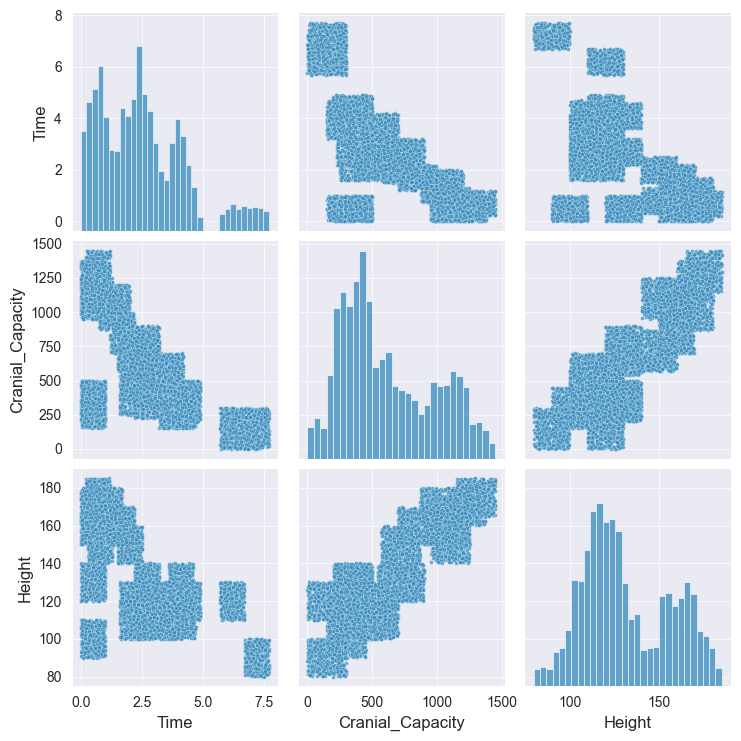

In [25]:
sns.pairplot(df,
             plot_kws={
                 's': 8,
                 'alpha': 0.7
             })

#### Visualising Scatterplots with classes

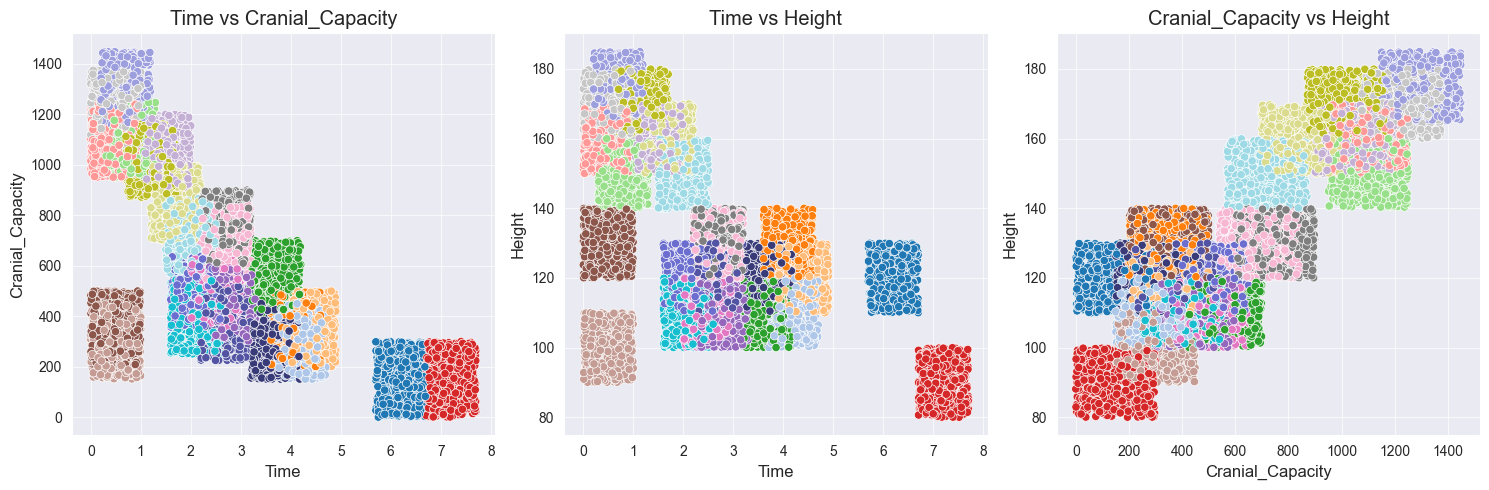

In [106]:
import itertools

base_palette = sns.color_palette("tab20", 20)
extra_palette = sns.color_palette("tab20b", 4)
custom_palette = base_palette + extra_palette

num_cols = df.columns[df.dtypes == float]

combinations = list(itertools.combinations(num_cols, 2))

fig, axes = plt.subplots(nrows=1, ncols=len(combinations), figsize=(5 * len(combinations), 5))

for ax, (x, y) in zip(axes, combinations):
    sns.scatterplot(data=df, x=x, y=y, hue=target_var, palette=custom_palette, ax=ax, alpha=1)
    ax.legend().remove()
    ax.set_title(f"{x} vs {y}")

plt.tight_layout()
plt.show()

It appears that most of the classes are easily distinguishable, being separated from each other, which may indicate an easy classification problem.

#### Histograms in detail

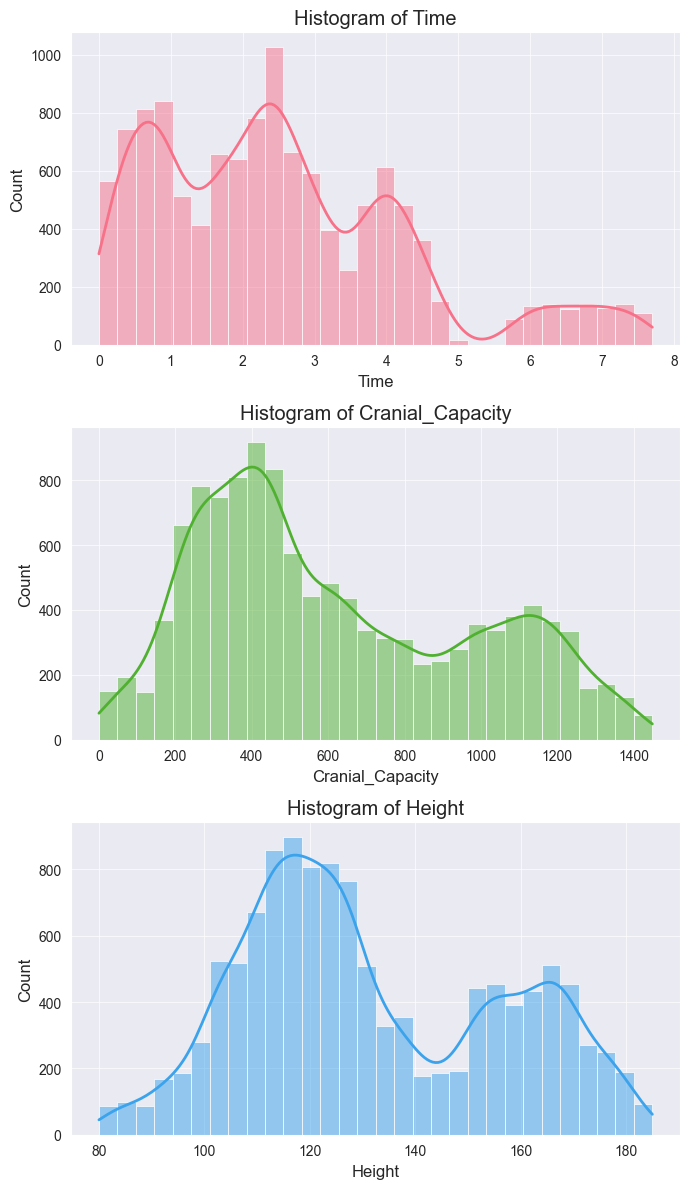

In [28]:
colors = sns.color_palette("husl", len(num_cols))

fig, axes = plt.subplots(nrows=len(num_cols), figsize=(7, 4 * len(num_cols)))

for ax, col, color in zip(axes, num_cols, colors):
    sns.histplot(df[col], bins=30, kde=True, ax=ax, color=color)
    ax.set_title(f"Histogram of {col}")

plt.tight_layout()
plt.show()

#### Boxplots

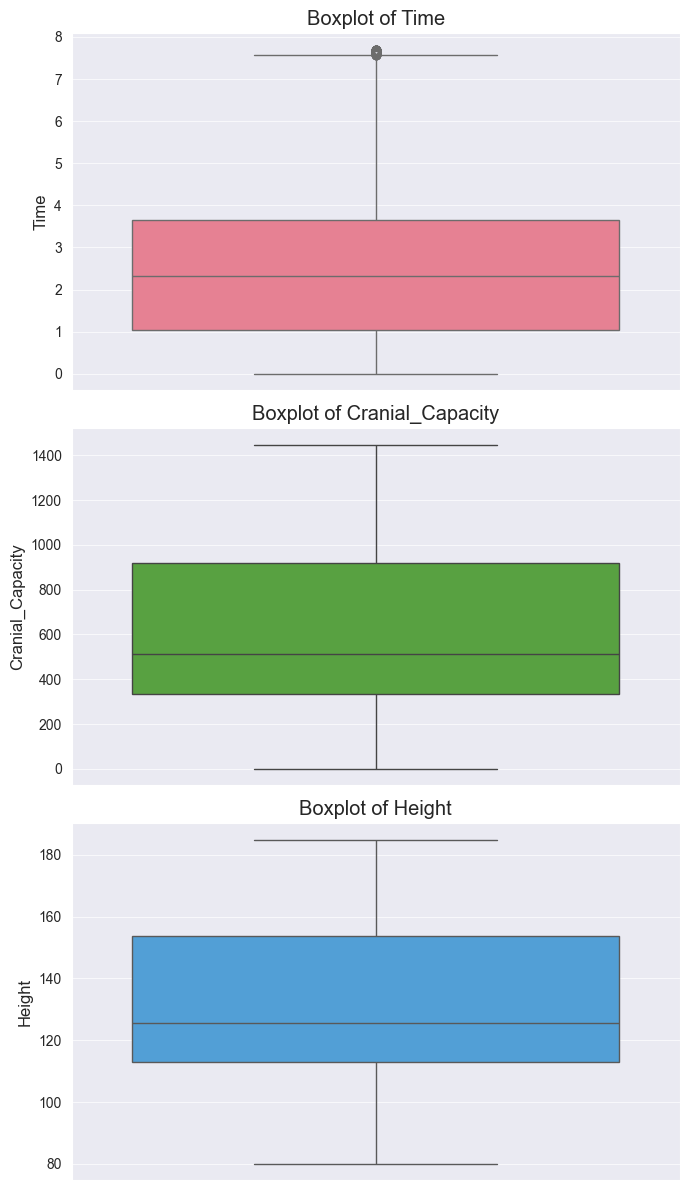

In [30]:
fig, axes = plt.subplots(nrows=len(num_cols), figsize=(7, 4 * len(num_cols)))

for ax, col, color in zip(axes, num_cols, colors):
    sns.boxplot(df[col], ax=ax, color=color)
    ax.set_title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

#### Correlation Heatmap

Text(0.5, 1.0, 'Correlation Heatmap')

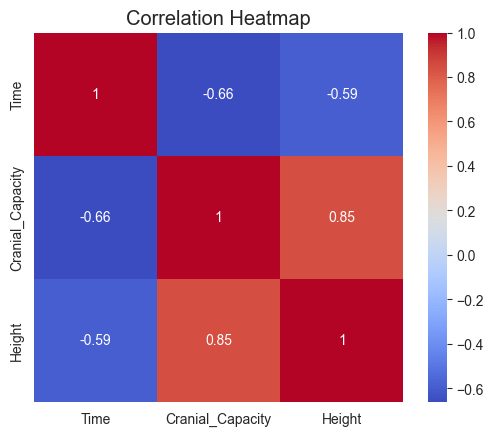

In [32]:
corr_matrix = df.corr(numeric_only=True)
ax = sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, square=True)
ax.set_title('Correlation Heatmap')

#### Inspecting Categorical Features

In [34]:
cat_cols = df.columns[df.dtypes == object].drop(target_var)
df[cat_cols].nunique().sort_values()

Foots                      2
Migrated                   2
Canines_Shape              2
Canine Size                2
Location                   3
Vertical_Front             3
Sexual_Dimorphism          3
Arms                       3
Tecno                      3
Skeleton                   3
Jaw_Shape                  4
biped                      4
Hip                        4
Zone                       4
Anatomy                    4
Foramen_Mágnum_Position    4
Torus_Supraorbital         5
Incisor_Size               5
Diet                       5
Prognathism                6
Tecno_type                 6
Tooth_Enamel               7
Habitat                    8
Current_Country            8
dtype: int64

#### Pie Charts and Barplots

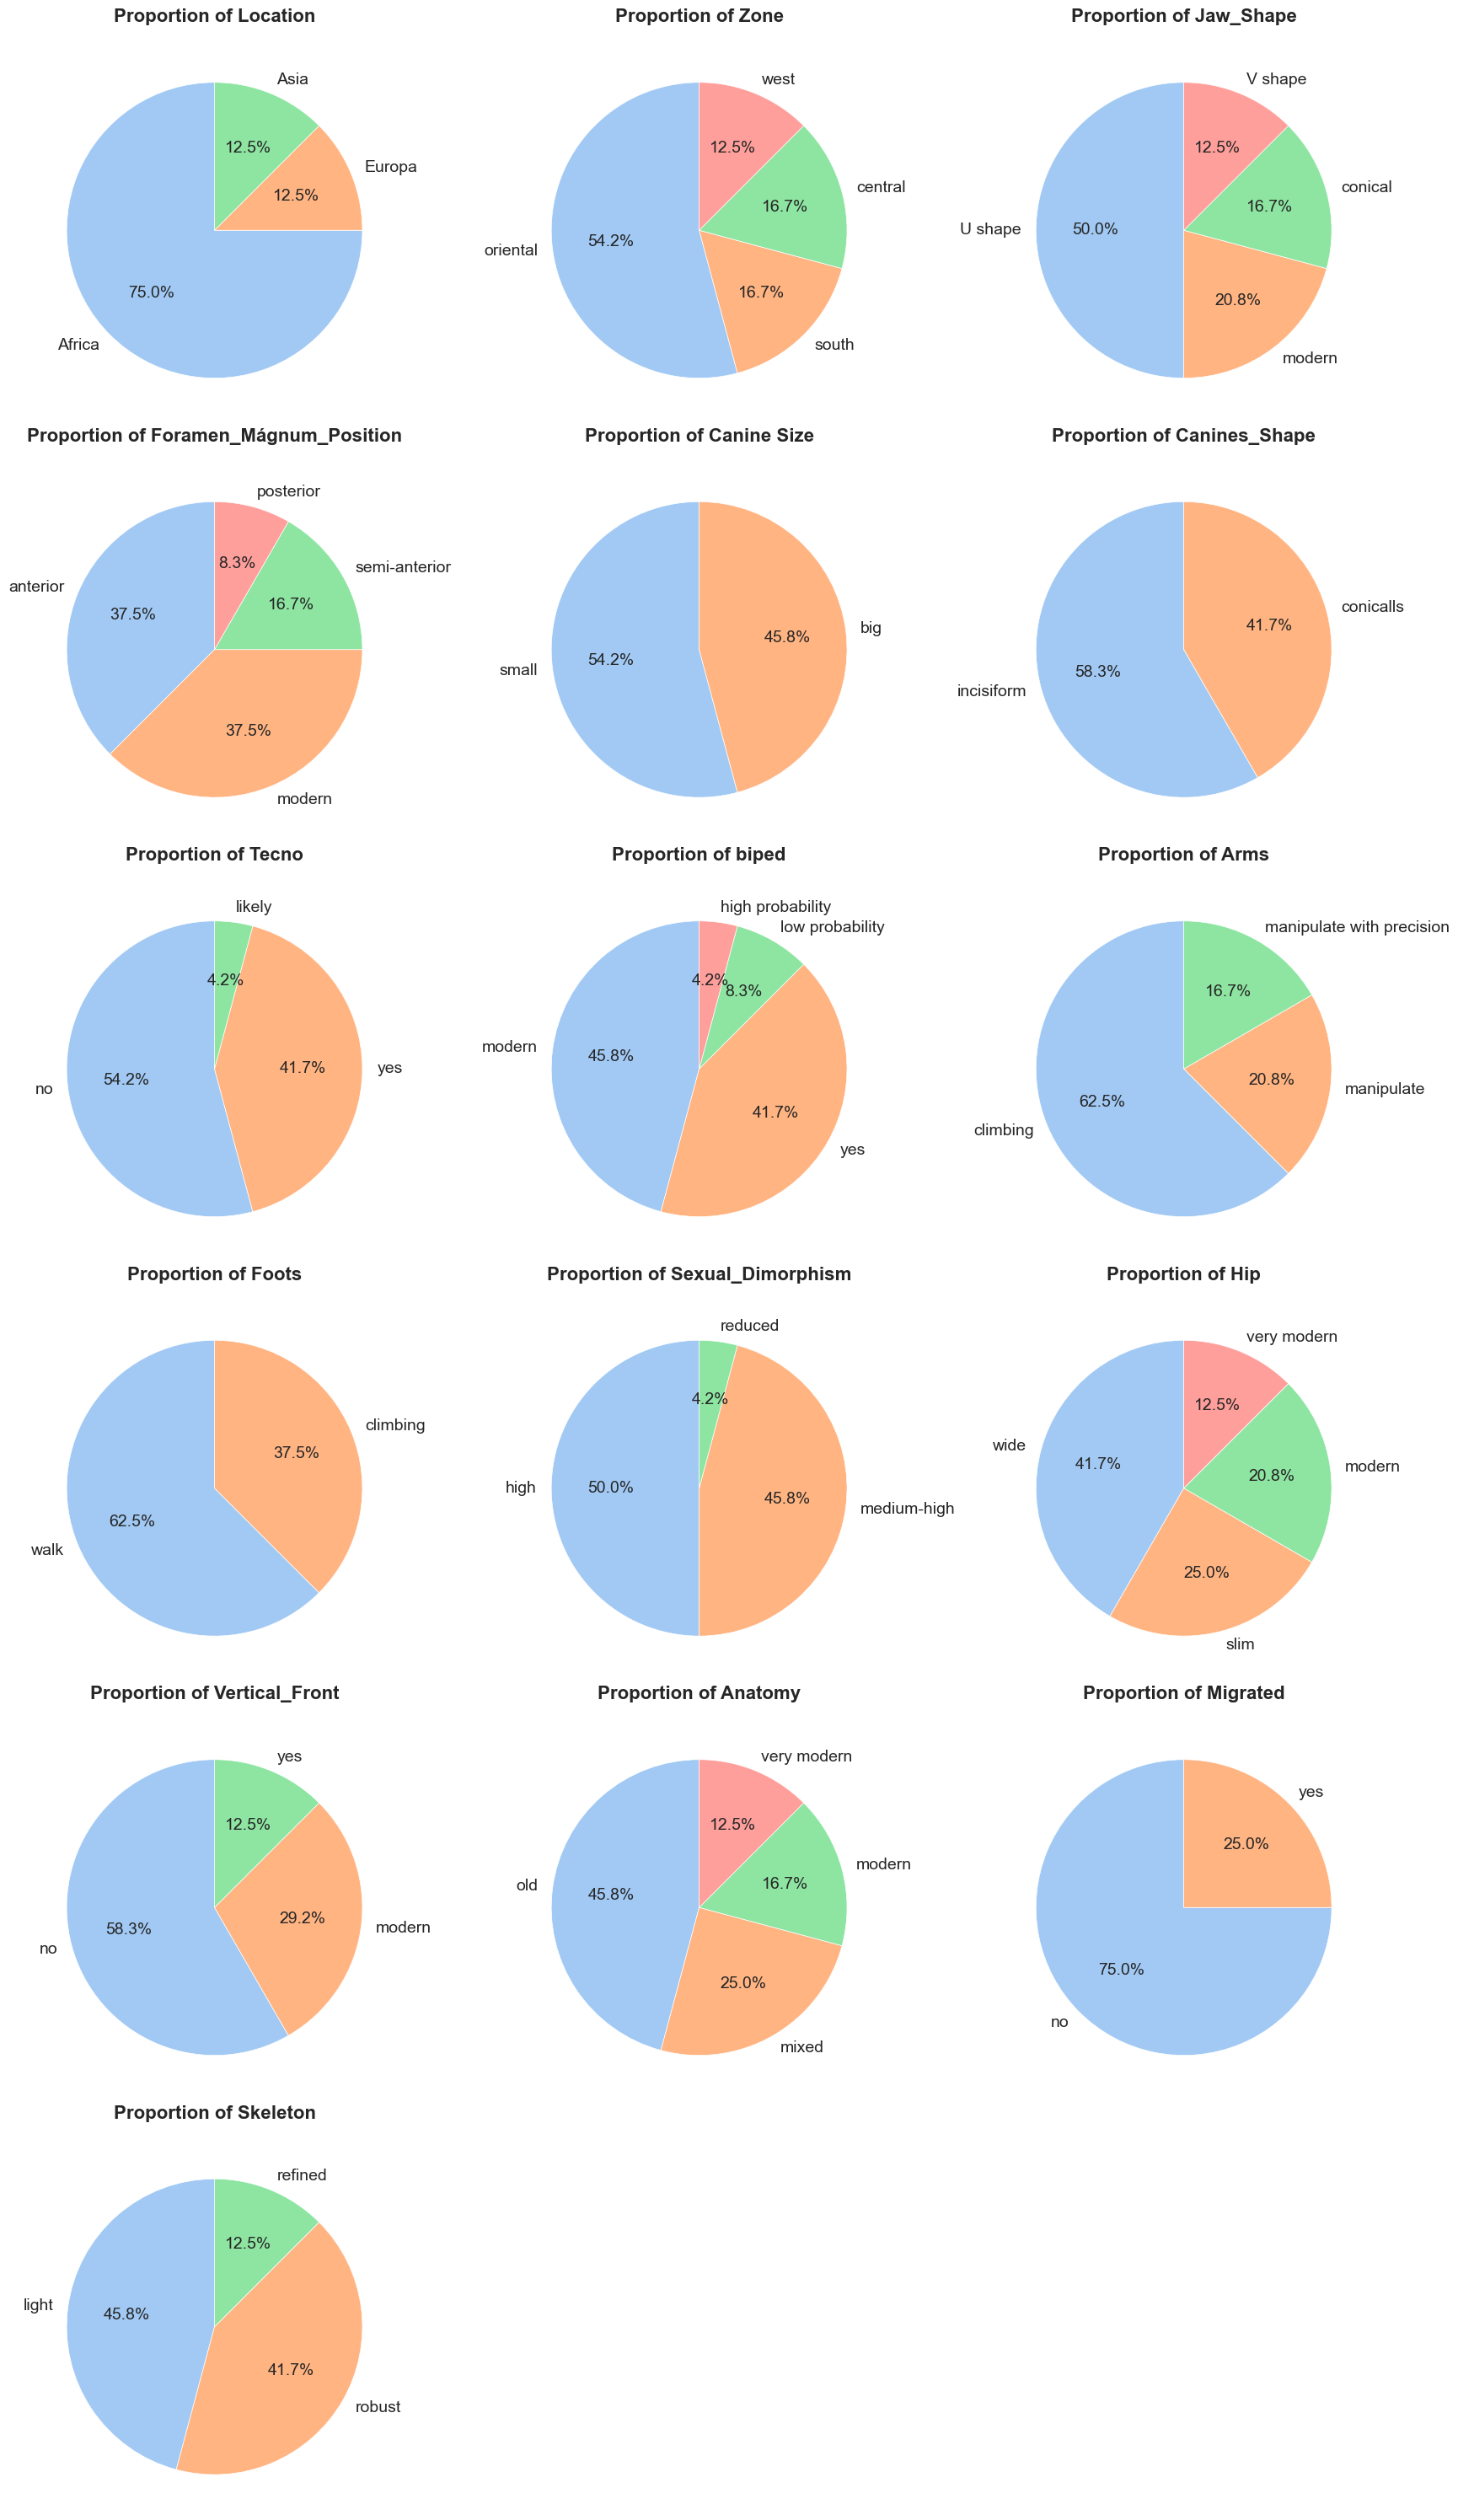

In [36]:
small_cat_cols = [col for col in cat_cols if df[col].nunique() <= 4]
cols = len(small_cat_cols)
rows = (cols + 2) // 3  
fig, axes = plt.subplots(nrows=rows, ncols=3, figsize=(18, 5*rows))
axes = axes.ravel()  

for idx, col in enumerate(small_cat_cols):
    df[col].value_counts().plot(kind="pie", startangle=90, 
                               autopct="%1.1f%%",
                               textprops={'fontsize': 14},
                               colors=sns.color_palette("pastel"), 
                               ax=axes[idx])
    axes[idx].set_title(f"Proportion of {col}", pad=20, fontsize=16, fontweight='bold')
    axes[idx].set_ylabel("")

# Hide empty subplots
for idx in range(cols, len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()

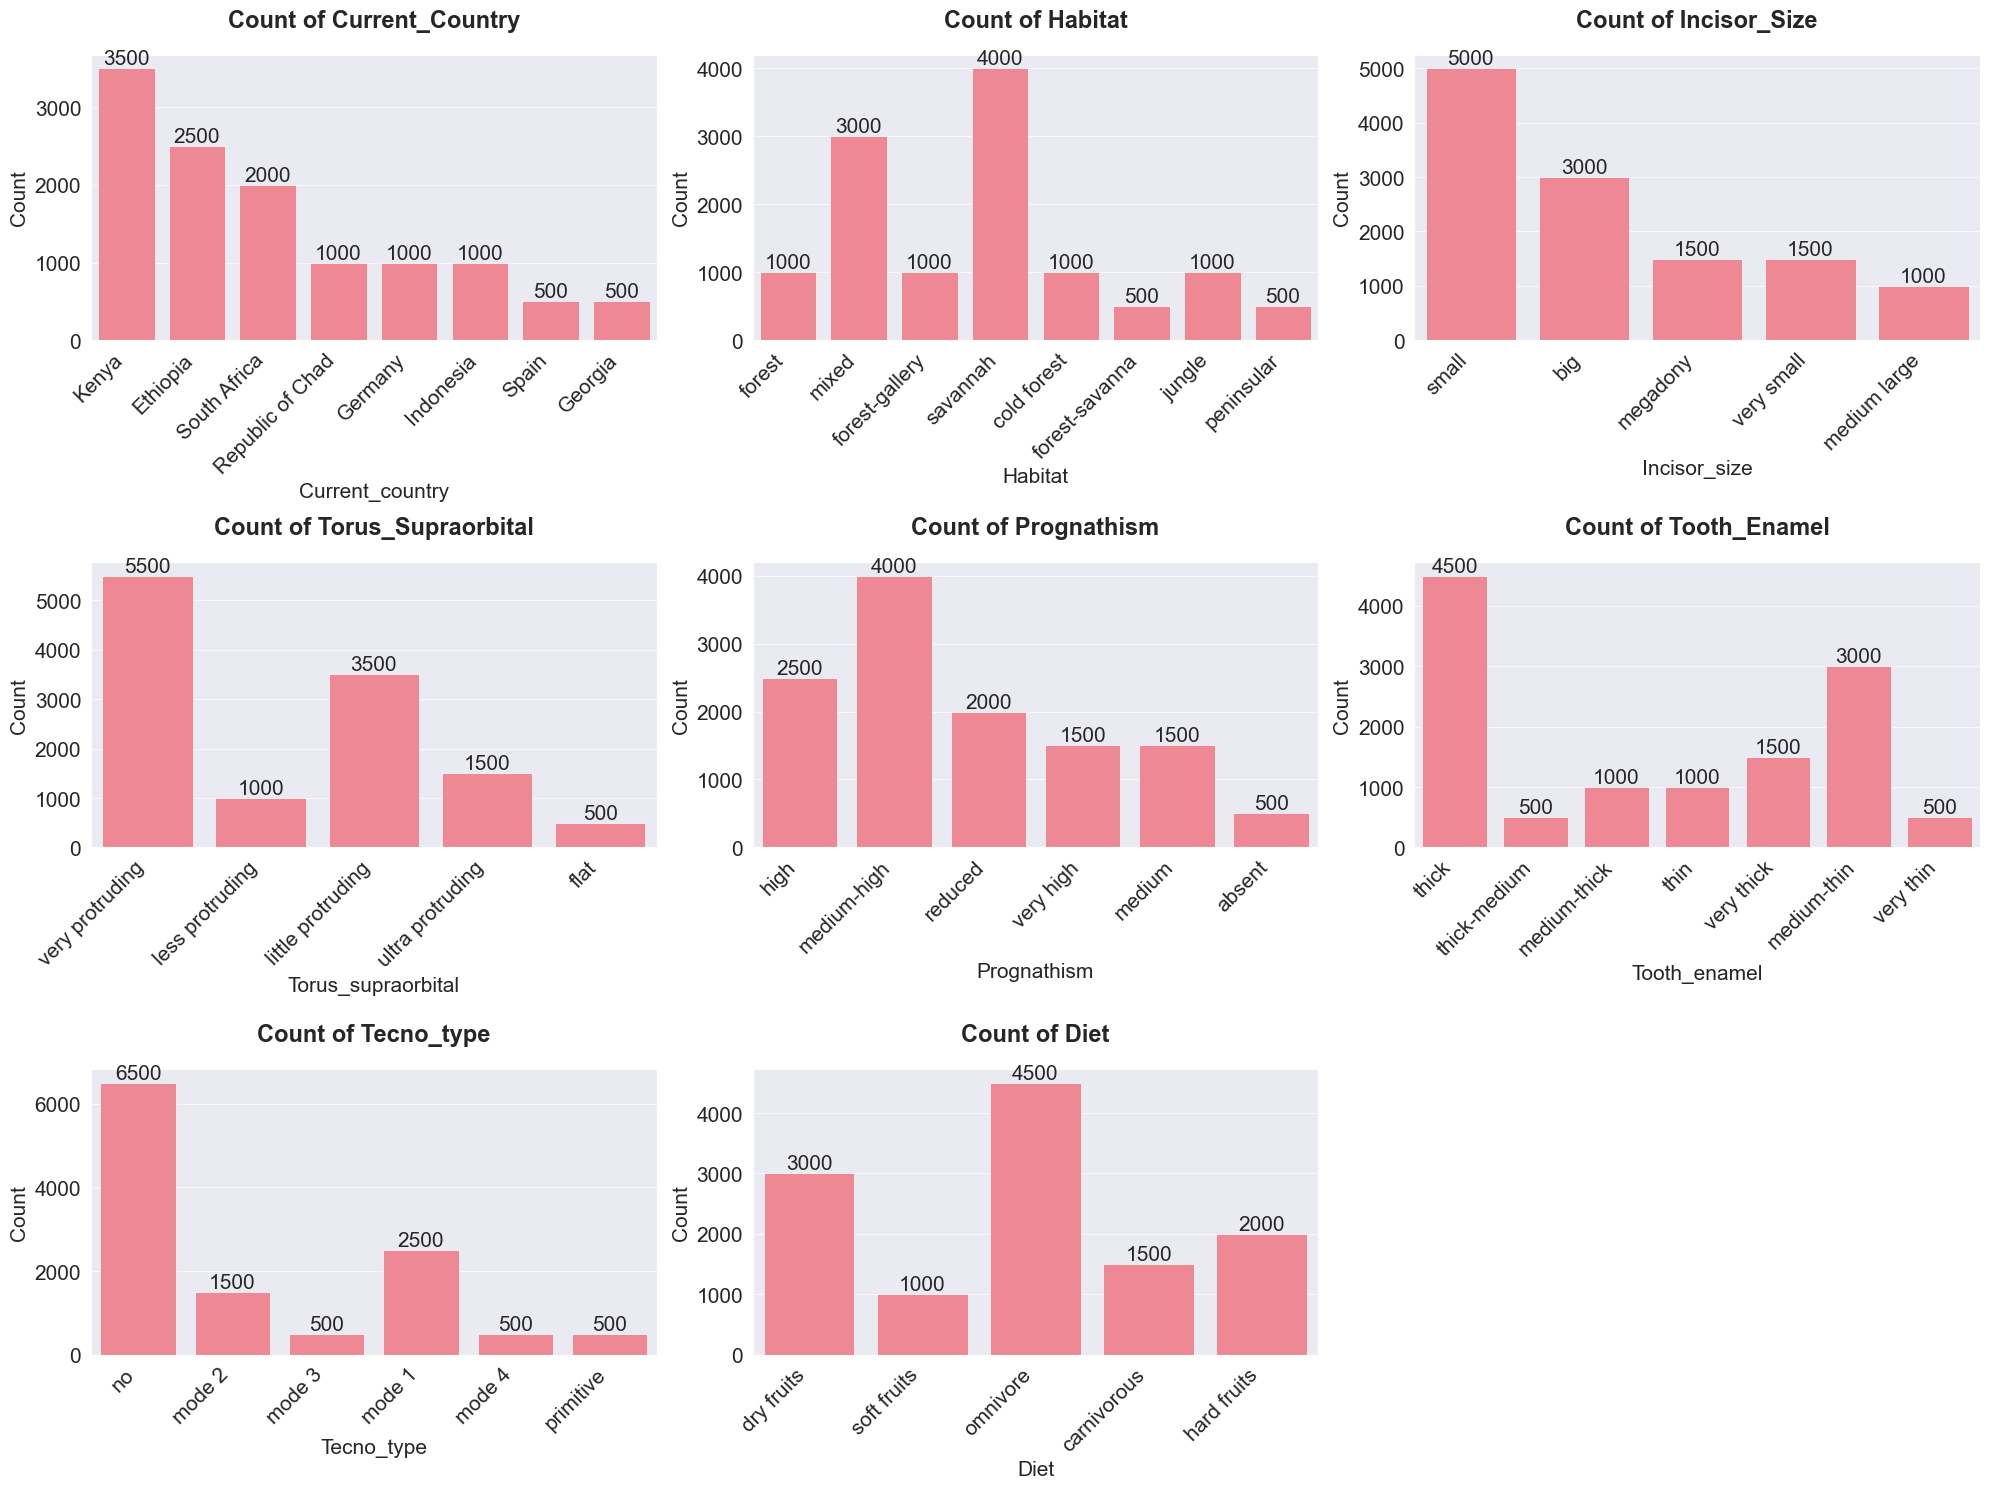

In [37]:
# For bar plots
large_cat_cols = [col for col in cat_cols if 5 <= df[col].nunique()]
cols = len(large_cat_cols)
rows = (cols + 2) // 3  
fig, axes = plt.subplots(nrows=rows, ncols=3, figsize=(20, 5*rows))
axes = axes.ravel()  

for idx, col in enumerate(large_cat_cols):
    # Create the countplot
    sns.countplot(data=df, x=col, ax=axes[idx], color='#f78')
    
    # Get the current tick positions and labels
    current_ticks = axes[idx].get_xticks()
    current_labels = [label.get_text() for label in axes[idx].get_xticklabels()]
    
    # Set the ticks and labels explicitly
    axes[idx].set_xticks(current_ticks)
    axes[idx].set_xticklabels(current_labels, rotation=45, ha='right', fontsize=15)
    axes[idx].set_xlabel(col.capitalize(), fontsize=15)
    
    # Set title and y-axis font size
    axes[idx].set_title(f"Count of {col}", pad=20, fontsize=17, fontweight='bold')
    axes[idx].tick_params(axis='y', labelsize=15)
    axes[idx].set_ylabel('Count', fontsize=15)
    
    # Add value labels on top of each bar
    for p in axes[idx].patches:
        axes[idx].annotate(f'{int(p.get_height())}', 
                          (p.get_x() + p.get_width()/2., p.get_height()),
                          ha='center', 
                          va='bottom',
                          fontsize=15)

# Hide empty subplots
for idx in range(cols, len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()

### Observations

#### **1. Numeric Variables**

##### **a) Time Distribution**
- **Concentration in the Last 4.5 Million Years**  
  Most specimens fall within the past 4.5 million years, with fewer data points extending back to ~7.7 million years. This likely reflects both the fossil record’s availability and sampling biases.

##### **b) Height Distribution**
- **Bimodal/Multimodal Peaks**  
  Two prominent peaks around **115 cm** and **165 cm** suggest distinct clusters—potentially reflecting different hominin groups (e.g., early Australopithecines vs. later Homo species).

##### **c) Cranial Capacity Distribution**
- **Multiple Clusters**  
  Histograms suggest clusters around **400 cc** and **1150 cc**, corresponding to major transitions in hominin evolution (e.g., Australopithecines vs. various Homo species).

##### **d) Correlations**
- **Time vs. Height and Cranial Capacity (Negative Moderate Correlation)**  
  Older specimens (further in the past) generally exhibit smaller cranial capacities and shorter stature.
- **Height vs. Cranial Capacity (Positive High Correlation)**  
  Larger body size is often associated with larger brain size in the hominin lineage.

---

#### **2. Categorical Variables**

##### **a) Geographical Distribution**
- **Concentration in Kenya, Ethiopia, and South Africa**  
  Reflects real-world fossil discovery hotspots and potential sampling bias toward well-studied regions.

##### **b) Habitat**
- **Dominance of Savannah**  
  The “Savannah Hypothesis” is supported by a high frequency of savannah habitats, followed by mixed habitats.

##### **c) Diet**
- **Omnivory as the Most Common Category**  
  Suggests broad dietary flexibility among hominins. Dry fruits is the next most frequent, indicating specialized adaptations in certain groups.

##### **d) Dental Traits (Incisors, Canines, Teeth and Jaw)**
- **Medium/Small Incisor Sizes**
  Large incisors appear less frequently; could indicate dietary changes away from hyper-robust dentition.
- **Small Canine Prevalence**
  The slight dominance of small canines over big ones could suggest a reduction in sexually dimorphic traits or decreased reliance on canine-related behaviors common in earlier species.
- **Thick Enamel Prevalence**  
  Thick or very thick enamel is common, consistent with many hominin fossils.
- **U-Shape Jaw Dominance**
  The strong prevalence of U-shaped jaws over V-shaped and conical forms suggests a trend toward wider dental arcades, possibly reflecting adaptations in masticatory patterns or dietary habits.

---

#### **3. Integrative Insights**

1. **Evolutionary Trends**  
   - Over time, there is a general increase in **Height** and **Cranial_Capacity**, aligning with well-documented hominin evolutionary patterns.

2. **Ecological & Geographical Patterns**  
   - Fossil finds are **heavily concentrated in East and South Africa**, highlighting both their importance as early hominin habitats and sampling biases.

3. **Dietary Adaptations**  
   - The high prevalence of **omnivory** indicates **dietary flexibility**, a likely advantage for hominin dispersal and adaptation.

4. **Morphological Correlations**  
   - **Height** and **Cranial Capacity** scale together, suggesting that increases in brain size and body size often go hand in hand.

5. **Tool Use**  
   - **Stone tools** are most common, though rarer categories (e.g., bone, wood) may be underrepresented due to preservation issues.

---

## Feature Engineering

In [42]:
X_train, X_test, y_train, y_test = train_test_split(
                                        df.drop(target_var, axis=1),
                                        df[target_var],
                                        test_size=0.2,
                                        random_state=42
                                    )

In [43]:
print(f'''Shape of the sets:
            X_train: {X_train.shape}
            y_train: {y_train.shape}
            X_test: {X_test.shape}
            y_test: {y_test.shape}
''')

Shape of the sets:
            X_train: (9600, 27)
            y_train: (9600,)
            X_test: (2400, 27)
            y_test: (2400,)



In [44]:
num_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

transformer = ColumnTransformer([
    ('cat_transformer', cat_pipeline, cat_cols),
    ('num_transformer', num_pipeline, num_cols)
])

In [45]:
X_train = transformer.fit_transform(X_train)
X_test = transformer.transform(X_test)

In [46]:
l_encoder = LabelEncoder()
y_train = l_encoder.fit_transform(y_train)
y_test = l_encoder.transform(y_test)

---

## Model Training and Testing

In [49]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, InputLayer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [50]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

In [51]:
model = Sequential()
model.add(InputLayer(shape=(X_train.shape[1],), sparse=True))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(20, activation='relu'))
model.add(Dense(24, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [52]:
history = model.fit(X_train,
                    y_train,
                    epochs=1000,
                    batch_size=32,
                    validation_split=.2,
                    callbacks=[early_stopping])

Epoch 1/1000
240/240 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.2866 - loss: 2.5314 - val_accuracy: 1.0000 - val_loss: 0.1072
Epoch 2/1000
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9194 - loss: 0.3461 - val_accuracy: 1.0000 - val_loss: 0.0048
Epoch 3/1000
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9683 - loss: 0.1311 - val_accuracy: 1.0000 - val_loss: 7.1774e-04
Epoch 4/1000
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9753 - loss: 0.0935 - val_accuracy: 1.0000 - val_loss: 2.7414e-04
Epoch 5/1000
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9826 - loss: 0.0606 - val_accuracy: 1.0000 - val_loss: 1.4706e-04
Epoch 6/1000
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9867 - loss: 0.0481 - val_accuracy: 1.0000 - val_loss: 3.5768e-05
Epoch 7/1000
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9864 - loss: 0.0451 - val_accuracy: 1.0000 - val_loss: 5.3165e-05
Epoch 8/1000
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.98

In [53]:
train_results = model.evaluate(X_train, y_train)
test_results = model.evaluate(X_test, y_test)

print(f'''
Train results:
Loss={train_results[0]}, Accuracy={train_results[1]*100}%
Test results:
Loss={test_results[0]}, Accuracy={test_results[1]*100}%
''')

300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 0.0000e+00
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0000e+00

Train results:
Loss=0.0, Accuracy=100.0%
Test results:
Loss=0.0, Accuracy=100.0%



### Testing with K-Fold Cross Validation

In [55]:
from sklearn.model_selection import KFold

k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

fold_accuracies = []

for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
    
    model = Sequential()
    model.add(InputLayer(shape=(X_train.shape[1],), sparse=True))
    model.add(Dense(50, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(50, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(24, activation='softmax'))

    model.compile(optimizer=Adam(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    
    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        verbose=1
    )
    
    model.fit(X_train_fold, y_train_fold, 
              epochs=1000, 
              batch_size=32, 
              validation_data=(X_val_fold, y_val_fold), 
              callbacks=[early_stopping])
    
    loss, accuracy = model.evaluate(X_val_fold, y_val_fold, verbose=0)
    fold_accuracies.append(accuracy)
    print(f'Fold accuracy: {accuracy*100:.2f}%')

mean_accuracy = np.mean(fold_accuracies)
std_accuracy = np.std(fold_accuracies)
print(f'\Mean Accuracy: {mean_accuracy*100:.2f}%')
print(f'Standard Deviation of Accuracy: {std_accuracy*100:.2f}%')

<>:44: SyntaxWarning: invalid escape sequence '\M'
<>:44: SyntaxWarning: invalid escape sequence '\M'
C:\Users\David\AppData\Local\Temp\ipykernel_7844\2082708569.py:44: SyntaxWarning: invalid escape sequence '\M'
  print(f'\Mean Accuracy: {mean_accuracy*100:.2f}%')


Epoch 1/1000
240/240 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.2492 - loss: 2.5785 - val_accuracy: 1.0000 - val_loss: 0.1656
Epoch 2/1000
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8941 - loss: 0.4030 - val_accuracy: 1.0000 - val_loss: 0.0102
Epoch 3/1000
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9528 - loss: 0.1683 - val_accuracy: 1.0000 - val_loss: 0.0030
Epoch 4/1000
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9688 - loss: 0.1082 - val_accuracy: 1.0000 - val_loss: 5.8244e-04
Epoch 5/1000
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9779 - loss: 0.0765 - val_accuracy: 1.0000 - val_loss: 2.6438e-04
Epoch 6/1000
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9821 - loss: 0.0589 - val_accuracy: 1.0000 - val_loss: 1.1382e-04
Epoch 7/1000
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9855 - loss: 0.0524 - val_accuracy: 1.0000 - val_loss: 6.9896e-05
Epoch 8/1000
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9876 -

### Introducing noise in order to see model's performance

In [115]:
import random

y_train_noisy = y_train.copy()
num_noisy_labels = int(0.20 * len(y_train))
random_indices = random.sample(range(len(y_train)), num_noisy_labels)

for idx in random_indices:
    y_train_noisy[idx] = random.choice(range(24))

history_noisy = model.fit(X_train, y_train_noisy, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])
test_results_noisy = model.evaluate(X_test, y_test)

print(f'Test Accuracy with More Noisy Labels: {test_results_noisy[1] * 100:.2f}%')

Epoch 1/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7981 - loss: 1.2574 - val_accuracy: 0.8177 - val_loss: 1.1011
Epoch 2/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7981 - loss: 1.2395 - val_accuracy: 0.8177 - val_loss: 1.1016
Epoch 3/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7942 - loss: 1.2503 - val_accuracy: 0.8177 - val_loss: 1.0998
Epoch 4/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7983 - loss: 1.2261 - val_accuracy: 0.8177 - val_loss: 1.0962
Epoch 5/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8071 - loss: 1.1797 - val_accuracy: 0.8177 - val_loss: 1.0969
Epoch 6/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7948 - loss: 1.2409 - val_accuracy: 0.8177 - val_loss: 1.1001
Epoch 7/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7960 - loss: 1.2163 - val_accuracy: 0.8177 - val_loss: 1.1043
Epoch 8/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8074 - loss: 1.1755 - val_accu

### Introducing noise in y_test labels

In [117]:
y_test_noisy = y_test.copy()
num_noisy_labels_test = int(0.20 * len(y_test))
random_indices_test = random.sample(range(len(y_test)), num_noisy_labels_test)

for idx in random_indices_test:
    y_test_noisy[idx] = random.choice(range(24))

test_results_noisy = model.evaluate(X_test, y_test_noisy)
print(f'Test Accuracy with Noisy Test Labels: {test_results_noisy[1] * 100:.2f}%')

75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8129 - loss: 1.1193
Test Accuracy with Noisy Test Labels: 81.17%


It seems that the model is solid despite having suspicious results (100% in train and test accuracy). This is probably in line with previous findings on a hypothetical easy classification problem.

### Visualising predictions

#### Confusion Matrix

75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


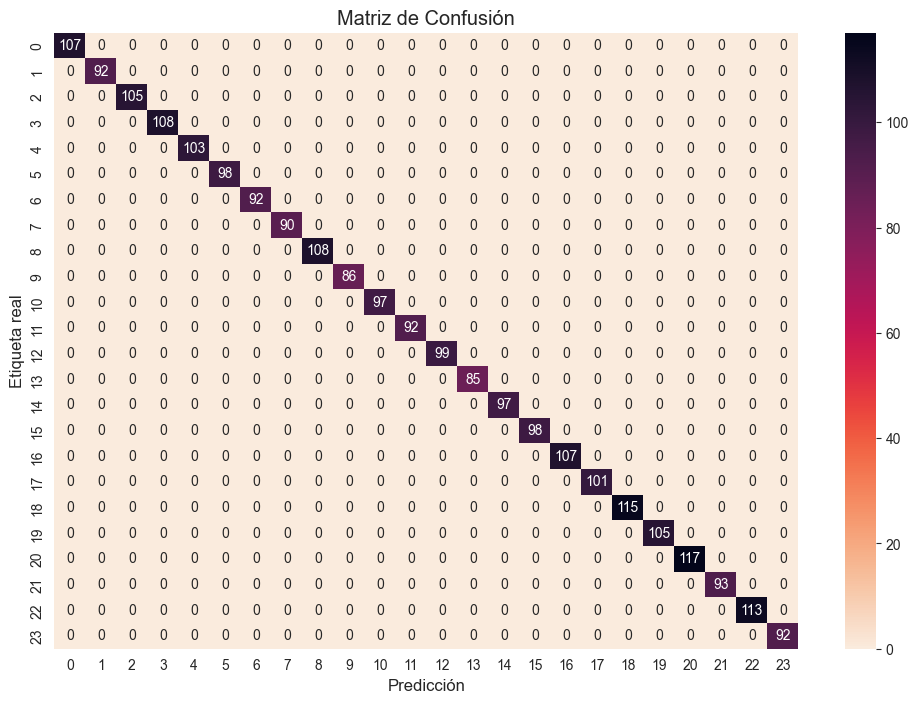

In [126]:
from sklearn.metrics import confusion_matrix

# Obtener predicciones del modelo
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="rocket_r", xticklabels=range(24), yticklabels=range(24))
plt.xlabel("Predicción")
plt.ylabel("Etiqueta real")
plt.title("Matriz de Confusión")
plt.show()


#### Visualising Accuracy and Loss in Training and Testing

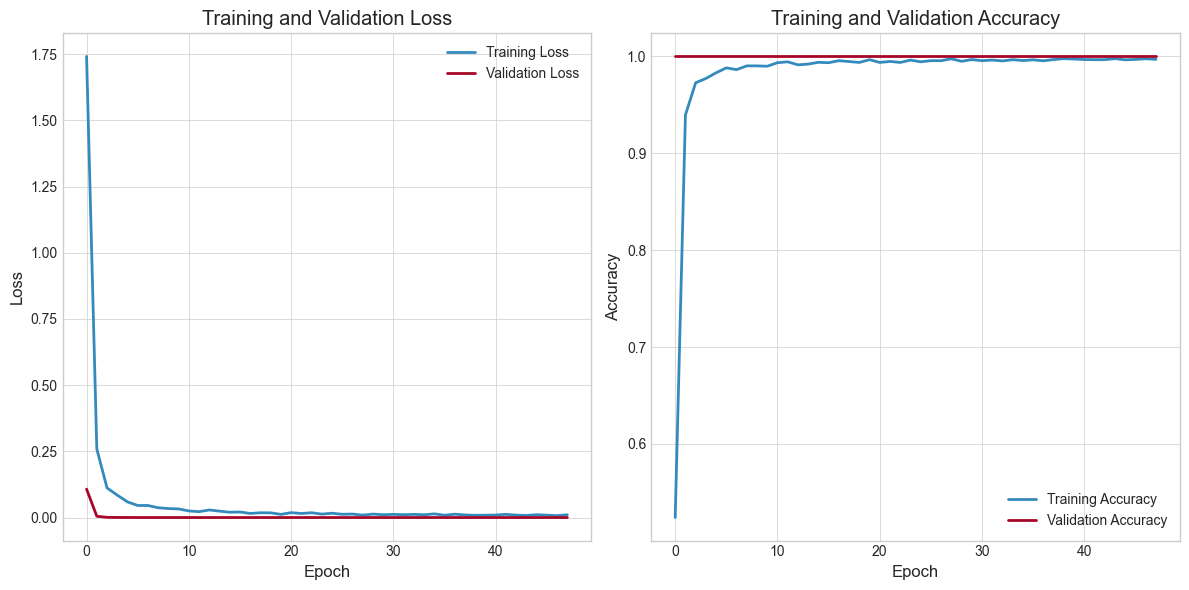

In [134]:
plt.figure(figsize = (12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

## Conclusion

A fairly robust model was achieved that is able to predict multiple classes of human ancestors with high confidence.